# Imports

In [93]:
from enum import Enum

import matplotlib.pyplot as plt

from numpy import corrcoef
import numpy as np

import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

import sys

# Dados

## Carregando dados

In [33]:
train_data = pd.read_csv('../datasets/regression_data/regression_train.csv')
test_data = pd.read_csv('../datasets/regression_data/regression_test.csv')

train_data.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


In [34]:
print('Info')
print(train_data.info())

print('\nDescription')
train_data.describe()

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 65.2 KB
None

Description


,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,1042.000000,1031.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,1349.940229,2.421925,-0.460781,52.094329,2.462871,-65.284233,4.381958,-1.287435
std,1593.201095,3.182976,4.426286,31.374828,2.541632,9.033489,3.290306,11.066380
min,0.062551,-8.699406,-13.651540,38.035456,0.002360,-121.450423,0.000000,-69.835905
25%,230.632308,0.170590,-3.307931,47.087106,0.671196,-69.126630,0.000000,-7.830007
50%,808.374368,2.508671,-0.461150,49.972867,1.652609,-65.360660,5.000000,-1.074191
75%,1849.754221,4.540218,2.406651,52.674305,3.361181,-61.187635,8.000000,5.659476
max,10382.469480,12.380693,12.926106,500.000000,18.813009,53.919202,8.000000,30.376348


In [35]:
print('Info')
print(test_data.info())

print('\nDescription')
test_data.describe()

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  180 non-null    float64
 1   X1      261 non-null    float64
 2   X2      261 non-null    float64
 3   X3      261 non-null    float64
 4   X4      261 non-null    float64
 5   X5      261 non-null    float64
 6   X6      261 non-null    int64  
 7   X7      261 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 16.4 KB
None

Description


,target,X1,X2,X3,X4,X5,X6,X7
count,180.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,1083.167620,2.118804,-0.729926,50.019371,2.570686,-65.634193,4.153257,-1.896956
std,1266.764414,2.924070,4.065920,4.109684,2.456733,7.827388,3.345416,10.133573
min,0.619759,-7.187993,-12.530861,38.282205,0.017793,-123.280755,0.000000,-56.751775
25%,203.306229,0.220241,-3.113019,47.368662,0.798704,-69.361831,0.000000,-7.315595
50%,623.905972,2.038765,-0.816475,50.070453,1.824582,-65.517502,5.000000,-1.918715
75%,1522.742335,4.008733,1.836272,52.659709,3.587555,-61.681399,8.000000,4.315239
max,8270.877273,9.586412,11.610249,65.704951,16.798910,-43.237419,8.000000,27.284085


## Remover NaNs
X2 e target tem NaNs então vou remover. X2 tem poucos nulos e target é o alvo então não faz sentindo ter nulos.

In [36]:
def remove_nans(data, cols):
    return data.dropna(subset=cols, axis=0)

train_data = remove_nans(train_data, ['X2', 'target'])
test_data = remove_nans(test_data, ['X2', 'target'])

print('Train')
print(train_data.info())

print('\nTest')
print(test_data.info())

Train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 1 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      715 non-null    float64
 2   X2      715 non-null    float64
 3   X3      715 non-null    float64
 4   X4      715 non-null    float64
 5   X5      715 non-null    float64
 6   X6      715 non-null    int64  
 7   X7      715 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 50.3 KB
None

Test
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 260
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  180 non-null    float64
 1   X1      180 non-null    float64
 2   X2      180 non-null    float64
 3   X3      180 non-null    float64
 4   X4      180 non-null    float64
 5   X5      180 non-null    float64
 6   X6      180 non-null    int64  
 7   X7      180 non

## Normalizar

In [37]:
normalize_cols = [f'X{i + 1}' for i in range(7)]

scaler = MinMaxScaler()
train_data[normalize_cols] = scaler.fit_transform(train_data[normalize_cols])
test_data[normalize_cols] = scaler.transform(test_data[normalize_cols])

train_data.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,1349.940229,0.452411,0.318831,0.483384,0.123404,0.321968,0.572028,0.318831
std,1593.201095,0.171943,0.193631,0.163098,0.132892,0.054310,0.404657,0.193631
min,0.062551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230.632308,0.339629,0.168304,0.376488,0.031262,0.298598,0.000000,0.168304
50%,808.374368,0.451656,0.289782,0.485317,0.080640,0.321448,0.625000,0.289782
75%,1849.754221,0.559354,0.432888,0.594943,0.166679,0.344034,1.000000,0.432888
max,10382.469480,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Não parece ter nenhum outlier muito grande.

## Preprocess data

In [38]:
def split(data):
    return data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']], data['target']

train_X, train_Y = split(train_data)
test_X, test_Y = split(test_data)

# Modeling

In [89]:
class ModelType(Enum):
    GradientBoostingRegressor = 1
    RandomForestRegressor = 2
    AdaBoostRegressor = 3

class Model:
    def __init__(self, model_type, n_estimators=200):
        self.regressor = None
        if model_type == ModelType.GradientBoostingRegressor:
            self.regressor = GradientBoostingRegressor(n_estimators=n_estimators)
        elif model_type == ModelType.RandomForestRegressor:
            self.regressor = RandomForestRegressor(n_estimators=n_estimators)
        elif model_type == ModelType.AdaBoostRegressor:
            self.regressor = AdaBoostRegressor(n_estimators=n_estimators)
        self.n_estimators = n_estimators
        self.model_name = model_type.name

        assert(self.regressor is not None) # No model was set
    
    def train(self, X, Y):
        self.regressor.fit(X, Y)
        
    def predict(self, X):
        return self.regressor.predict(X)
        
    def test(self, X, Y):
        predicted_Y = self.predict(X)
        
        return {
            'rmse': mean_squared_error(Y, predicted_Y, squared=False),
            'r2': r2_score(Y, predicted_Y),
            'cor': corrcoef(Y, predicted_Y)[0][1]
        }

# Training and Testing

In [90]:
best_model = None
best_result = sys.maxsize
estimators_possibilities = [50, 100, 200, 300, 400, 500, 750, 1000]

for k in ModelType:
    for n_estimator in estimators_possibilities:
        model = Model(ModelType[k.name], n_estimator)
        model.train(train_X, train_Y)
        results = model.test(test_X, test_Y)

        print(k.name, n_estimator)
        print(results)

        if results['rmse'] > best_result:
            continue
    
        best_result = results['rmse']
        best_model = model
    print()



GradientBoostingRegressor 50
{'rmse': 132.25663458070645, 'r2': 0.9890386839642475, 'cor': 0.9946256737757948}
GradientBoostingRegressor 100
{'rmse': 105.2308857210996, 'r2': 0.9930607231200288, 'cor': 0.9965476769661886}
GradientBoostingRegressor 200
{'rmse': 96.08548058299044, 'r2': 0.9942144680270387, 'cor': 0.9971254844278808}
GradientBoostingRegressor 300
{'rmse': 92.49435336819992, 'r2': 0.994638846947641, 'cor': 0.9973352506575726}
GradientBoostingRegressor 400
{'rmse': 90.43960651178232, 'r2': 0.9948743954920387, 'cor': 0.9974531833553979}
GradientBoostingRegressor 500
{'rmse': 89.47063483082356, 'r2': 0.9949836387730933, 'cor': 0.9975105760881228}
GradientBoostingRegressor 750
{'rmse': 88.29347090693265, 'r2': 0.9951147708020894, 'cor': 0.9975746460269136}
GradientBoostingRegressor 1000
{'rmse': 87.82085955122923, 'r2': 0.9951669294846326, 'cor': 0.9976006582872611}

RandomForestRegressor 50
{'rmse': 141.00792091160923, 'r2': 0.9875400935084645, 'cor': 0.9938301050272773}
Rand

In [91]:
best_model.model_name, best_model.n_estimators

('GradientBoostingRegressor', 1000)

# Analisando impacto das features no modelo

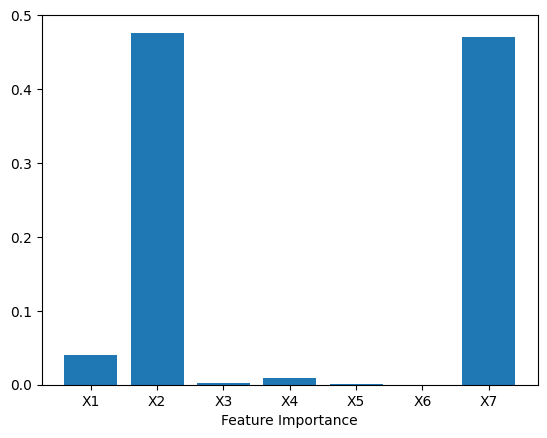

In [96]:
plt.bar(train_X.columns, model.regressor.feature_importances_)
plt.xlabel("Feature Importance")
plt.show()

As features que tem o maior impacto no modelo são a X2 e X7.